In [105]:
#Importing Modules
import numpy as np # Used for math
import os # Used to open the datasets
import random # Used for random function
from keras.models import Sequential # It imports a
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization # Used to create layers
import cv2 
from sklearn.model_selection import train_test_split
import pandas as pd

print(os.listdir("../input"))

['vgg16', 'cell-images-for-detecting-malaria']


In [107]:
Data = []

Uninfected = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected")
Parasitized = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized")

for x in Uninfected: # For every uninfected Picture
    Data.append(["../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/"+x,0]) # Take the Uninfected cell and label it as uninfected(as 0)
    
for x in Parasitized: #For every infected Picture
    Data.append(["../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/"+x,1]) # Take the Infected cells and label it as infected


In [108]:
random.shuffle(Data) # Shuffle the datasets to prepare for training
Image = [x[0] for x in Data] # Includes all Imagees 
Label = [x[1] for x in Data] # Includes all Labels (Order of labels match with the images)


In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(Image, Label, test_size=0.1, random_state=42) # Splitting the Training and Testing Data through Sci-kit learn
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=46)

In [110]:
def GetPic(path): # A function that reads a picture then returns it ina 60 x 60 x 3 pixel image format 
    im = cv2.imread(path,1)
    im = cv2.resize(im,(60,60))
    im = im/255
    return im



In [111]:
# Setting up the variables to store the datasets
X_images = []
Y_images = []
X_val_im = []
Y_val_im = []

c = 0

for x in range(len(X_train)): # Inserts X_Train and Y_Train to X_images and Y_images respectively

    try:
        X_images.append(GetPic(X_train[x]))
        Y_images.append(Y_train[x])
        c += 1
    
    except:
        print('c: ' + str(c))

        
Y_train = Y_images


c = 0

for x in range(len(X_val)): #Loop to have val images to X_val_im and Y_val_im

    try:
        X_val_im.append(GetPic(X_val[x]))
        Y_val_im.append(Y_val[x])
    
    except:
        print('c: ' + str(c))
        
Y_val = Y_val_im # part of the validation data


X_images = np.array(X_images) # Creates an array of matrixes for the training and validation 
X_val_im = np.array(X_val_im)

c: 6385
c: 0


**Train with Convolutional Neural Network**

In [112]:
ConvNet = Sequential() # Creates a new model in which we could add layers 
# The layers as described in the methodology

ConvNet.add(Conv2D(32, kernel_size=3, activation='relu',input_shape=(60,60,3))) # Convolutional Layer 
ConvNet.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2))) # Subsampling Layer 

ConvNet.add(Conv2D(32, kernel_size=3, activation='relu'))
ConvNet.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

ConvNet.add(Conv2D(16, kernel_size=3, activation='relu')) #
ConvNet.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

ConvNet.add(Flatten()) # Fully Connected Layer
ConvNet.add(Dense(1, activation='sigmoid')) # Loss Layer

ConvNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mse','mae']) 

In [113]:
ConvNet.fit(X_images, Y_train, validation_data=(X_val_im, Y_val), epochs = 10) # The Network st

Train on 22322 samples, validate on 2480 samples
Epoch 1/10
 1088/22322 [>.............................] - ETA: 1:35 - loss: 0.6894 - acc: 0.5322 - mean_squared_error: 0.2481 - mean_absolute_error: 0.4967

KeyboardInterrupt: 

In [ ]:
print(ConvNet.summary()) # The Structure and Summary of the Network 

In [ ]:
def show_accuracy_vs_epoch(history):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel('Accuracy', fontsize=13)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(legends, loc='lower right')

show_accuracy_vs_epoch(ConvNet.history)

**Train With VGG-16**

In [30]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['vgg16', 'cell-images-for-detecting-malaria']


In [33]:
import matplotlib.pyplot as plt
import seaborn
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint
%matplotlib inline
import glob
import cv2

In [37]:
infected = glob.glob('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/*.png')
uninfected = glob.glob('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/*.png')


In [39]:
print('Total number of Infected Cell Images are ',len(infected),' shape of first image is ',cv2.imread(infected[0]).shape)
print('Total number of Uninfected Cell Images are ',len(uninfected),' shape of the first image is ',cv2.imread(uninfected[0]).shape)

Total number of Infected Cell Images are  13779  shape of first image is  (106, 124, 3)
Total number of Uninfected Cell Images are  13779  shape of the first image is  (163, 148, 3)


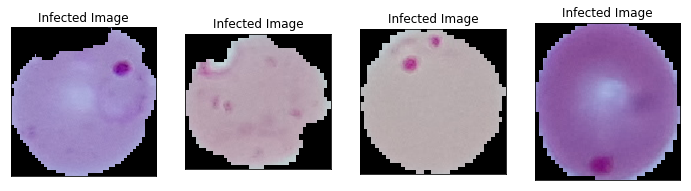

In [40]:
plt.figure(figsize=(12,5))
for i in range(1,5):
    plt.subplot(1,4,i)
    value = np.random.randint(100)
    image = cv2.imread(infected[value])
    plt.imshow(image)
    plt.title('Infected Image')
    plt.xticks([])
    plt.yticks([])

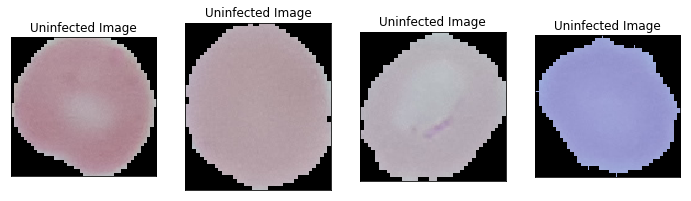

In [41]:
plt.figure(figsize=(12,5))
for i in range(1,5):
    plt.subplot(1,4,i)
    value = np.random.randint(100)
    image = cv2.imread(uninfected[value])
    plt.imshow(image)
    plt.title('Uninfected Image')
    plt.xticks([])
    plt.yticks([])

In [42]:


augmentor = ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,validation_split=0.2)



In [73]:


train_generator = augmentor.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images/',batch_size=64,
                                                target_size = (64,64),class_mode = 'binary',subset = 'training')
test_generator = augmentor.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images/',batch_size=64,target_size=(50,50),
                                              class_mode='binary',subset='validation')



Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [85]:
model3 = Sequential()
model3.add(Convolution2D(32,(5,5),activation='tanh',input_shape = (64,64,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))
model3.add(Convolution2D(32,(5,5),activation='tanh'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))
model3.add(Convolution2D(64,(5,5),activation='tanh'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(64,activation='tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization_19 (Batc (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 32)        25632     
_________________________________________________________________
batch_normalization_20 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
__________

In [ ]:


history_custom = model3.fit_generator(train_generator,steps_per_epoch=2000,
                              epochs = 5,validation_data=test_generator,validation_steps=64)



In [ ]:
vgg16 = VGG16(weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',include_top = False,input_shape = (50,50,3))

In [93]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [94]:
for layers in vgg16.layers[:-4]:
    layers.trainable = False

In [95]:


model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))



In [96]:


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [97]:
callback = ModelCheckpoint('model_vgg16.h5',monitor='val_acc',mode = 'max',save_best_only=True)
calls = [callback]

In [101]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=2000,
                              epochs=10,
                              validation_data=test_generator,
                              validation_steps=64,
                              callbacks = calls)

Epoch 1/10
  53/2000 [..............................] - ETA: 47:23 - loss: 8.0543 - acc: 0.5003

KeyboardInterrupt: 

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()